In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Question 2(c)

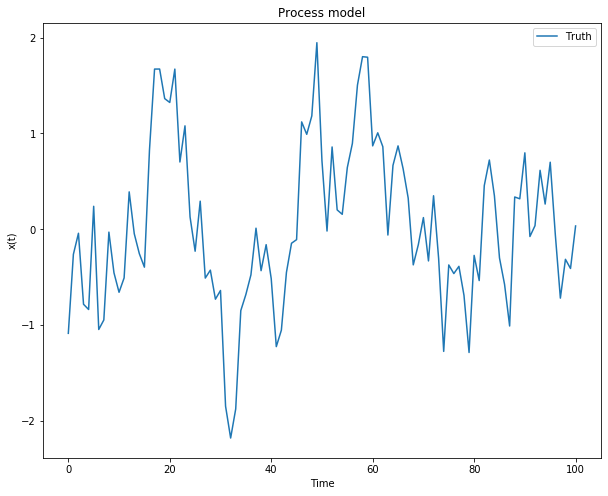

-1.0856306033005612

In [4]:
np.random.seed(123)
al = 0.7
T = np.linspace(0,100,101)
x = np.zeros(101)
x[0] = np.random.normal(0,1)
for t in range(1,101) :
    delta = np.random.normal(0,0.5)
    x[t] = al*x[t-1] + delta

plt.figure(figsize=(10,8))    
plt.plot(T,x)
plt.legend(['Truth'])
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.title('Process model')
plt.show() 
x[0]

In [3]:
x

array([-1.0856306 , -0.2612687 , -0.04139884, -0.78212655, -0.83678871,
        0.23996617, -1.0453633 , -0.94621062, -0.02937931, -0.45393572,
       -0.65719808, -0.50739314,  0.39051962, -0.04608727, -0.25425207,
       -0.39515208,  0.82635858,  1.67184405,  1.67231779,  1.36371565,
        1.32328524,  1.67166568,  0.70224904,  1.07948885,  0.12870186,
       -0.22878445,  0.29340349, -0.50895791, -0.4263049 , -0.72929088,
       -0.6383133 , -1.84611386, -2.17804626, -1.874571  , -0.84846848,
       -0.68074578, -0.47509909,  0.01154199, -0.43168878, -0.16036848,
       -0.5149412 , -1.22429358, -1.05245541, -0.44981585, -0.14557657,
       -0.10781885,  1.12070944,  0.99095269,  1.18303488,  1.94719609,
        0.7159946 , -0.01819788,  0.85911759,  0.20235095,  0.15648728,
        0.64419908,  0.89629255,  1.50484788,  1.80121558,  1.79554724,
        0.87052871,  1.00680143,  0.861897  , -0.05980483,  0.66678614,
        0.87036857,  0.63200304,  0.3258561 , -0.37105131, -0.15

## Question 2(d)

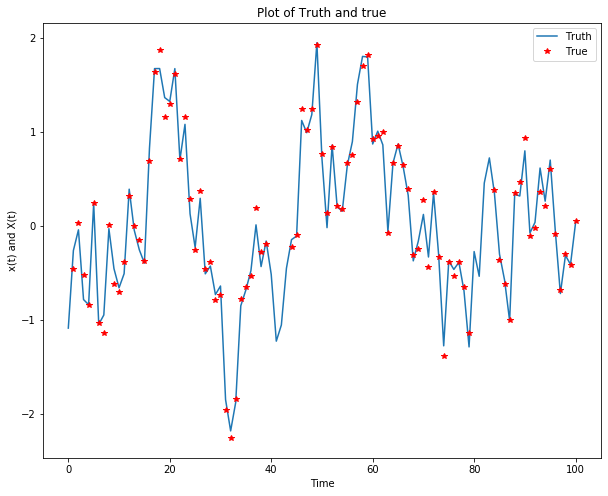

In [3]:
T_R=np.linspace(0,100,101)
R=[0,40,41,42,43,80,81,82,83]
TT=np.delete(T_R,R)
X=np.delete(x,R)
Y=np.zeros(92)
for t in range(len(TT)):
    error=np.random.normal(0,0.1)
    Y[t] = X[t] + error

plt.figure(figsize=(10,8))    
plt.plot(T,x)
plt.plot(TT,Y,"r*")
plt.legend(['Truth','True'])
plt.xlabel('Time')
plt.ylabel('x(t) and X(t)')
plt.title('Plot of Truth and true')
plt.show()  

## Question 2(e)

In [4]:
def Kalfilt(alpha,sigma,mu,Q,R,N):
    k=np.zeros(N)
    mu_new=np.zeros(N)
    sig_new=np.zeros(N)
    mu_old=alpha*mu
    sig_old=Q+alpha*sigma*alpha

    Y_t = np.zeros(100)
    for i in range (100):
        if (i in remove) == False:
            Y_t[i]=x[i]+ np.random.normal(0,0.1)
        else:
            Y_t[i] = 0
    for i in range(0,100):
        if (i in remove) == False:
            k[i]=sig_old*(sig_old+R)**(-1)
            mu_new[i]=mu_old+k[i]*(Y_t[i]-mu_old) 
            sig_new[i]=(1-k[i])*sig_old 
        else:
            mu_new[i]=mu_old 
            sig_new[i]=sig_old 
        mu_old=alpha*mu_new[i]
        sig_old=Q+alpha**2*sig_new[i]
    return k,mu_new,sig_new,mu_old,sig_old


In [5]:
alpha = 0.7
sigma = 1
mu =0
Q =0.5
R = 0.1
N = 100
remove= np.array([40,41,42,43, 80,81,82,83])

In [6]:
k,mu_new,sig_new,mu_old,sig_old=Kalfilt(alpha,sigma,mu,Q,R,N)

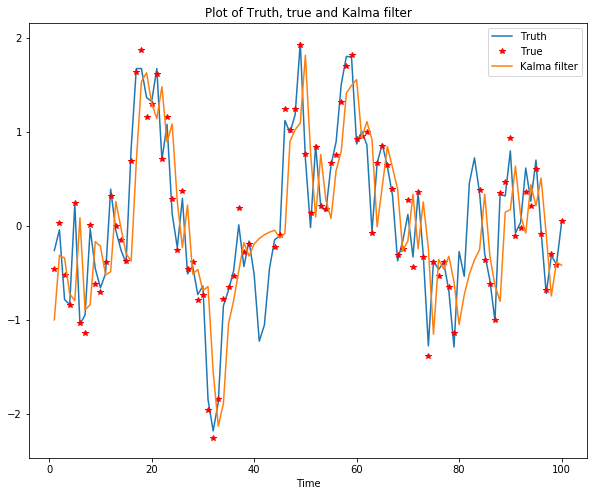

In [7]:

plt.figure(figsize=(10,8))
plt.plot(T[1:],x[1:])
plt.plot(TT,Y,"r*")
plt.plot(T[1:],mu_new)
plt.legend(['Truth','True','Kalma filter'])
plt.xlabel('Time')
plt.title('Plot of Truth, true and Kalma filter')
plt.show()  

## Question 2(f)

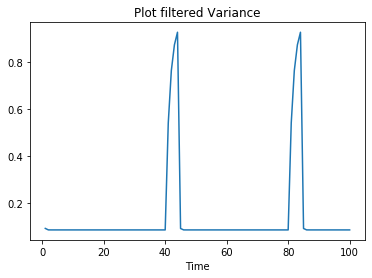

In [8]:
plt.plot(T[1:], sig_new)
plt.xlabel('Time')
plt.title('Plot filtered Variance')
plt.show() 